In [1]:
# Importing the libraries
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, normalize
from sklearn.utils.class_weight import compute_sample_weight
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import roc_auc_score
from sklearn.svm import LinearSVC

In [2]:
url= "https://cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud/IBMDeveloperSkillsNetwork-ML0101EN-SkillsNetwork/labs/Module%203/data/creditcard.csv"

raw_data = pd.read_csv(url)
raw_data.head()

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
0,0.0,-1.359807,-0.072781,2.536347,1.378155,-0.338321,0.462388,0.239599,0.098698,0.363787,...,-0.018307,0.277838,-0.110474,0.066928,0.128539,-0.189115,0.133558,-0.021053,149.62,0
1,0.0,1.191857,0.266151,0.166480,0.448154,0.060018,-0.082361,-0.078803,0.085102,-0.255425,...,-0.225775,-0.638672,0.101288,-0.339846,0.167170,0.125895,-0.008983,0.014724,2.69,0
2,1.0,-1.358354,-1.340163,1.773209,0.379780,-0.503198,1.800499,0.791461,0.247676,-1.514654,...,0.247998,0.771679,0.909412,-0.689281,-0.327642,-0.139097,-0.055353,-0.059752,378.66,0
3,1.0,-0.966272,-0.185226,1.792993,-0.863291,-0.010309,1.247203,0.237609,0.377436,-1.387024,...,-0.108300,0.005274,-0.190321,-1.175575,0.647376,-0.221929,0.062723,0.061458,123.50,0
4,2.0,-1.158233,0.877737,1.548718,0.403034,-0.407193,0.095921,0.592941,-0.270533,0.817739,...,-0.009431,0.798278,-0.137458,0.141267,-0.206010,0.502292,0.219422,0.215153,69.99,0


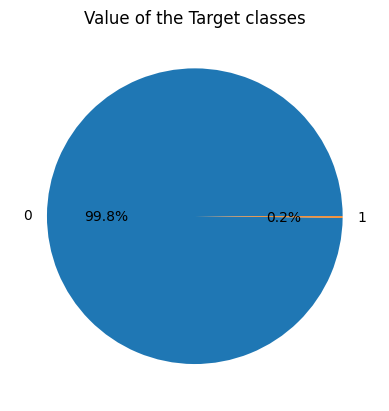

In [3]:
# Creating the label of the target
labels = raw_data.Class.unique()

# size of the each target
size =raw_data.Class.value_counts().values

#plotting the pie

fig, ax = plt.subplots()

ax.pie(size, labels=labels, autopct='%1.1f%%')
ax.set_title("Value of the Target classes")
plt.show()

<Axes: >

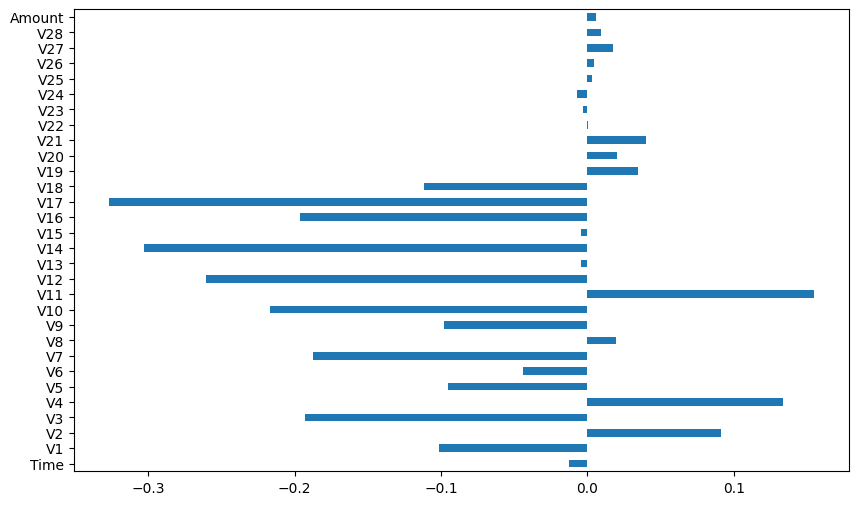

In [4]:
correlation_values = raw_data.corr()['Class'].drop('Class')
correlation_values.plot(kind='barh', figsize=(10, 6))

In [5]:
# Standardize the features for better model performance
raw_data.iloc[:, 1:30] = StandardScaler().fit_transform(raw_data.iloc[:, 1:30])
data_matrix = raw_data.values

# X: features, we remove Time from the features
X = data_matrix[:, 1:30]

# Y: Target class
y = data_matrix[:, 30]

#Normalize the data
X = normalize(X, norm='l1' )

In [6]:
# Train and split the data

X_train, X_test, y_train, y_test = train_test_split( X, y, test_size=0.3, random_state=42)

In [7]:
# Informing the model of the imabalance in the Target Feature
w_train = compute_sample_weight('balanced', y_train)

In [8]:
# Building the model
dt = DecisionTreeClassifier(max_depth=4, random_state=35)

#fitting the model
dt.fit(X_train, y_train, sample_weight=w_train)

DecisionTreeClassifier(max_depth=4, random_state=35)

##### Building a SVM model

In [9]:
# Build the Support Vector Machine model
svm = LinearSVC(class_weight='balanced', random_state=31, loss='hinge', fit_intercept=False)

# fitting the SVM model
svm.fit(X_train, y_train)

LinearSVC(class_weight='balanced', fit_intercept=False, loss='hinge',
          random_state=31)

In [10]:
# Check the probability of the test samples that belongs to fraudulent transactions
y_pred_dt = dt.predict_proba(X_test)[:, 1]

Using these probabilities, we can evaluate the Area Under the Receiver Operating Characteristic Curve (ROC-AUC) score as a metric of model performance.
The AUC-ROC score evaluates your model's ability to distinguish positive and negative classes considering all possible probability thresholds. The higher its value, the better the model is considered for separating the two classes of values.


In [11]:
roc_auc_dt = roc_auc_score(y_test, y_pred_dt)
print("Decision Tree ROC-AUC Score : {0:.3f}".format(roc_auc_dt))

Decision Tree ROC-AUC Score : 0.939


### Evaluating the Support Vector Machine

In [12]:
# compute the probability of the test sample belonging to the fraudulent transactions
y_pred_svm = svm.decision_function(X_test)

In [13]:
# Check the accuracy of the SVM on the test set in terms of the ROC-AUC Score
roc_auc_svm = roc_auc_score(y_test, y_pred_svm)
print("SVM ROC-AUC score: {0:.3f}".format(roc_auc_svm))

SVM ROC-AUC score: 0.986


# TOP 6 features in correlation with the target variable


In [14]:
# print the top 6 features that correlates with the target. NB: abs removes the negative sign
correlation_values = abs(raw_data.corr()['Class'].drop('Class'))
correlation_values = correlation_values.sort_values(ascending=False)[:6]
correlation_values

,Class
V17,0.326481
V14,0.302544
V12,0.260593
V10,0.216883
V16,0.196539
V3,0.192961


In [15]:
# Building with the top 6 features
X = data_matrix[:, [3,10,12,14,16,17]]


In [16]:
# train the model
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

In [17]:
# Balance the model with the imbalance in the target variable
w_train = compute_sample_weight('balanced', y_train)

In [18]:
# Inputting the decision tree
dt = DecisionTreeClassifier(max_depth=4, random_state=35)
dt.fit(X_train, y_train, sample_weight=w_train)

DecisionTreeClassifier(max_depth=4, random_state=35)

In [19]:
# checking the probability of the prediction
y_predict_ = dt.predict_proba(X_test)[:, 1]

In [20]:
# comparing the predicted with the untrained data
roc_auc_dt = roc_auc_score(y_test, y_predict_)
print("Decicision Tree ROC_AUC score is {0:.3f}".format(roc_auc_dt))

Decicision Tree ROC_AUC score is 0.921


For SVM


In [21]:
svms = LinearSVC(class_weight='balanced', random_state=35, loss='hinge', fit_intercept=False)
svms.fit(X_train, y_train)

/usr/local/lib/python3.11/dist-packages/sklearn/svm/_base.py:1249: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(


LinearSVC(class_weight='balanced', fit_intercept=False, loss='hinge',
          random_state=35)

In [22]:
y_predict_svm = svms.decision_function(X_test)

In [23]:
roc_auc_svms = roc_auc_score(y_test, y_predict_svm)
print("SVM ROC-AUC score: {0:.3f}".format(roc_auc_svms))

SVM ROC-AUC score: 0.972


Insights:  
1. With a larger set of features, SVM perform better in comparison to Decision Trees.
2. Decision Trees benefitted from feature selection and performed better.  
3. SVMs may require higher feature dimensionality to create efficient decision hyperplane.